"Garma, L. D., & Osório, N. S. (Submitted). Demystifying Dimensionality Reduction Techniques in the 'Omics' Era: A Practical Approach for Biological Science Students. *Corresponding authors: leonardo.garma@cnio.eski.se, nosorio@med.uminho.pt

# Installation

In [5]:
# When running on Google Colab only scanpy and loompy have to be installed.
# On other machines you might need to install the other modules.
!pip install -U scanpy loompy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52018 sha256=fef14658641dd8322cd2b7bf759c42f9dd7c857444695459f808f350402a1419
  Stored in directory: /root/.cache/pip/wheels/2c/22/1f/792a4621bb631e538bf1c21feae9bbaa6b19fd6d6ab382d1fd
Successfully built loompy


In [9]:
# Import the necessary modules every time you restart the notebook
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import os

# Import the data

In [10]:
# Download the scRNA-seq data for these examples
!wget https://figshare.com/ndownloader/files/38371136
os.rename('38371136', 'Melms_norm.loom')


# Explore the examples

In [11]:
# Read the loom file, which is a format for storing single-cell data
adata=sc.read_loom('Melms_norm.loom')

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [12]:
# Set the observation names and variable names to be the same as the ones in the file
adata.obs_names=adata.obs.obs_names
adata.var_names=adata.var.var_names

In [14]:
# Filter out observations (cells) that have less than 1000 counts or less than 1000 genes
adata=adata[adata.obs.n_counts>1000].copy()
adata=adata[adata.obs.n_genes>1000].copy()

In [15]:
# Select a subset of observations (cells) that have either AT1 or AT2 as their intermediate cell type
# and a subset of variables (genes) that are of interest for this analysis
test_data=adata[ (adata.obs.cell_type_intermediate=='AT1') | (adata.obs.cell_type_intermediate=='AT2'),['XIST','TSIX','UTY','USP9Y','TTTY14',
                                                          'SLC17A7','DRD1','GAD2','GAD1',
                                                          'SGMS2','RFX2','FOSB','NR4A1','LMNA','KLF6',
                                                          'FDFT1','FASN','SCD','ABCA1','HSP90AA1','TNFSF10']].copy()

In [16]:
# Filter out observations (cells) that have more than 5000 counts
test_data=test_data[test_data.obs.n_counts<5000].copy()
#test_data=test_data[test_data.obs.n_genes>1000].copy()

In [17]:
# Mark all variables (genes) as highly variable, which means they will be used for dimensionality reduction
test_data.var['highly_variable']=True

In [18]:
# Set the raw attribute of test_data to be the same as test_data, which means it will store the original data
test_data.raw=test_data

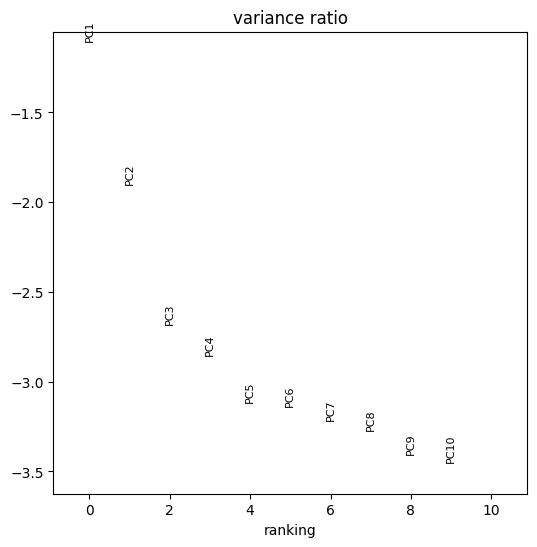

In [19]:
# Calculate the visualizations
plt.rcParams['figure.figsize']=(6,6) #rescale figures

# Set the number of principal components to be 10
n_pcs=10#test_data.n_vars-2

# Perform principal component analysis (PCA) on test_data, using only the highly variable genes
sc.pp.pca(test_data, n_comps=n_pcs, use_highly_variable=True, svd_solver='arpack',random_state=42)

# Plot the variance ratio of each principal component, using a logarithmic scale
sc.pl.pca_variance_ratio(test_data,n_pcs, log=True)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


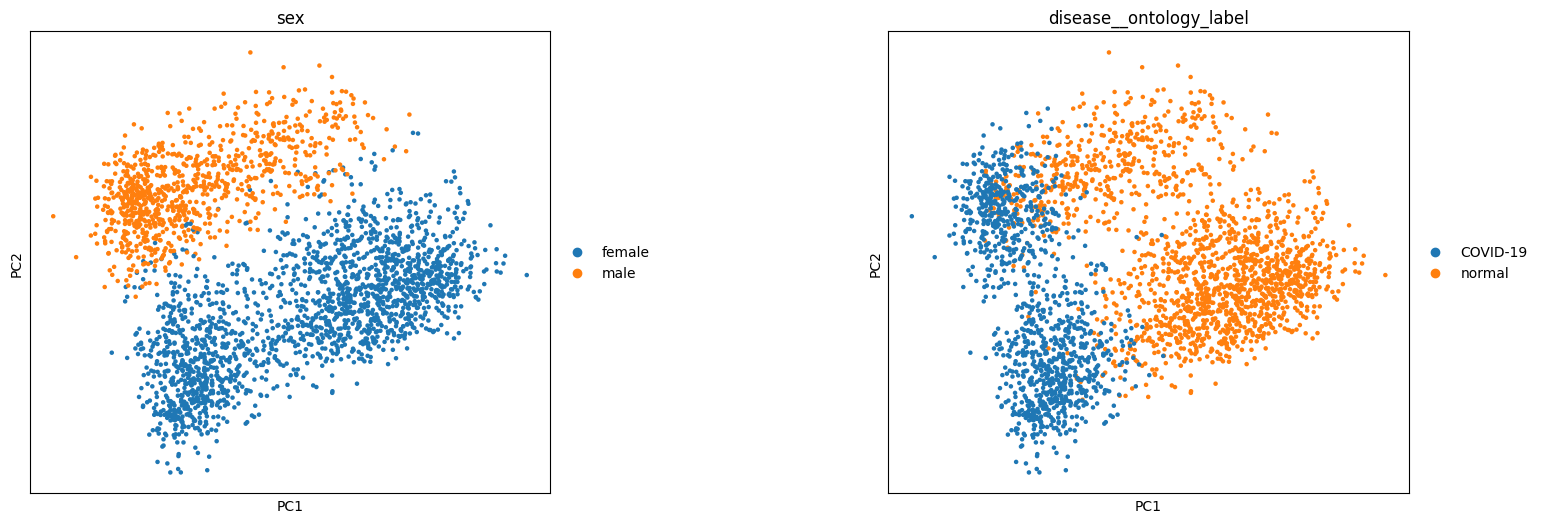

In [20]:
# Plot the scatter plot of the first two principal components, coloring by sex and disease ontology label
sc.pl.pca_scatter(test_data, color=['sex','disease__ontology_label'],wspace=0.5)


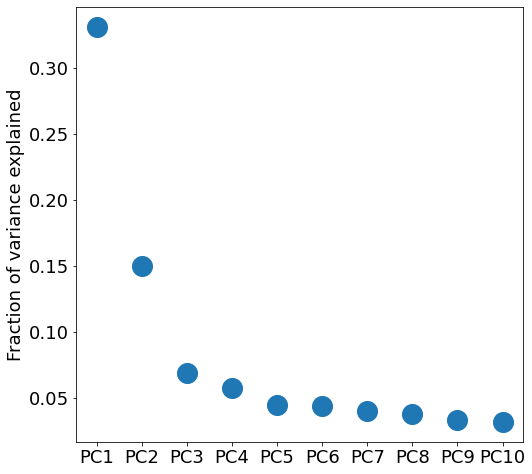

In [ ]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
plt.rcParams.update({'font.size': 18})

# Plot the variance ratio of each principal component as a circle, with a marker size of 20

plt.plot(test_data.uns['pca']['variance_ratio'],'o',markersize=20);
plt.ylabel('Fraction of variance explained')
plt.xticks(ticks=np.arange(10),labels=['PC'+i.astype(str) for i in np.arange(11)[1:]]);
#plt.xlabel('PC')


In [ ]:
# Create a data frame with the loadings of each gene on each principal component
loadings=pd.DataFrame(test_data.varm['PCs'],columns=['PC'+i.astype(str) for i in np.arange(11)[1:]])

# Add a column with the gene names
loadings['names']=test_data.var_names.values

# Add a column with the gene type, based on some predefined categories
loadings['type']=['X-linked gene','X-linked gene','Y-linked gene','Y-linked gene','Y-linked gene',
                  'Neuronal gene','Neuronal gene','Neuronal gene','Neuronal gene',
                  'COVID-triggered gene','COVID-triggered gene','COVID-triggered gene','COVID-triggered gene','COVID-triggered gene','COVID-triggered gene',
                  'COVID-repressed gene','COVID-repressed gene','COVID-repressed gene','COVID-repressed gene','COVID-repressed gene','COVID-repressed gene'
                  ]

loadings.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,names,type
0,0.239612,-0.545679,0.046443,-0.116131,0.004890,0.085037,0.060293,0.213487,0.435162,-0.055857,XIST,X-linked gene
1,0.210098,-0.517846,0.082460,-0.042170,-0.052736,0.131767,-0.165778,-0.358465,-0.535402,-0.250593,TSIX,X-linked gene
2,-0.144117,0.319349,-0.040336,0.070386,-0.048326,-0.011582,-0.081156,-0.013720,-0.149963,-0.154912,UTY,Y-linked gene


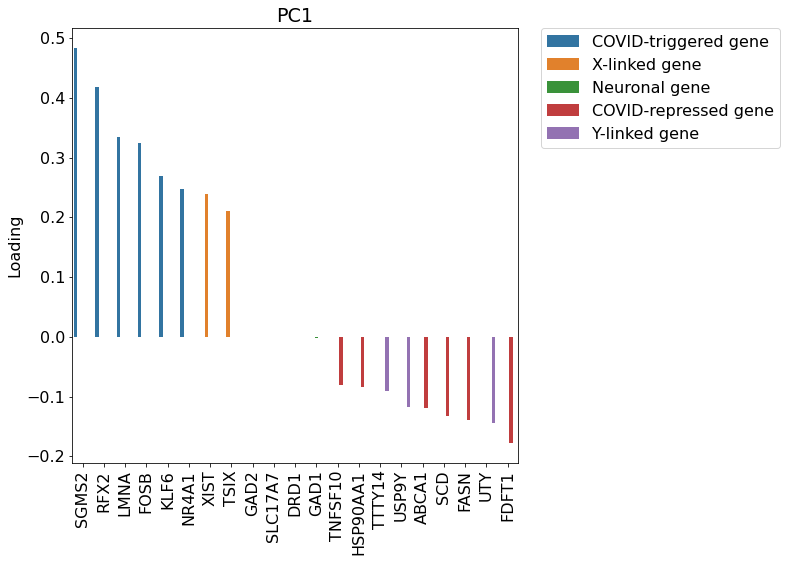

In [ ]:
# Sort the data frame by the loading on PC1 in descending order

loadings=loadings.sort_values('PC1',ascending=False)

# Plot a bar plot of the loading on PC1 for each gene, coloring by gene type
plt.rcParams.update({'font.size': 16})
g=sns.barplot(data=loadings,y='PC1',x='names',hue='type')
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.title('PC1')
plt.ylabel('Loading')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

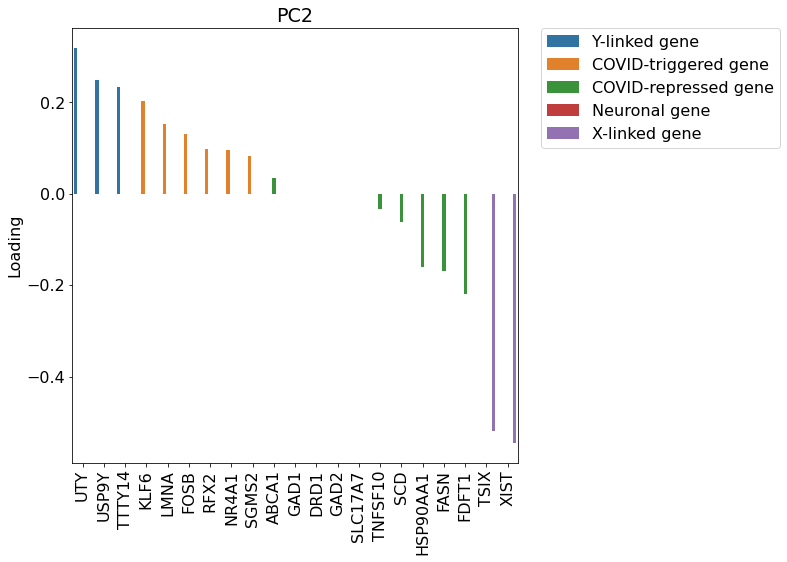

In [ ]:
# Sort the data frame by the loading on PC2 in descending order
loadings = loadings.sort_values('PC2', ascending=False)

# Plot a bar plot of the loading on PC2 for each gene, coloring by gene type
g = sns.barplot(data=loadings, y='PC2', x='names', hue='type')

# Rotate the x-axis labels by 90 degrees
for item in g.get_xticklabels():
    item.set_rotation(90)

# Set the title of the plot as "PC2"
plt.title('PC2')

# Label the y-axis as "Loading"
plt.ylabel('Loading')

# Remove the x-axis label
plt.xlabel('')

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
